# **Example 6** Validation of ATLID level 2 data

This notebook shows how A-EBD profiles (backscatter, extinction, lidar ratio and depol. ratio) can be compared with ground-based data from `.nc`-files.

In [16]:
import earthcarekit as eck

## Requirements

For this example you need a A-EBD file from an overpass and the matching ground data (e.g., PollyNET `.nc`-file).

Paste both file paths into the cell below:

In [17]:
fp_aebd = r"D:\earthcarekit_new\ec_data\ECA_EXBA_ATL_EBD_2A_20240902T210023Z_20250721T110708Z_01508B.h5"
fp_ground = r"D:\earthcarekit_new\ec_data\2024_09_02_Mon_TJK_00_00_01_2000_2130_profiles.nc"

# Also specify the ground site by either setting its name (string) or creating a custom GroundSite object:
site = "dushanbe"
radius_km = 100.0

## **6.1** Open and view datasets

In [18]:
print("Open the A-EBD dataset:")
with eck.read_product(fp_aebd) as ds_aebd:
    display(ds_aebd)

print("Open the ground-based dataset:")
with eck.read_nc(fp_ground) as ds_ground:
    display(ds_ground)

Open the A-EBD dataset:


<xarray.Dataset> Size: 243MB
Dimensions:                                                         (
                                                                     along_track: 5143,
                                                                     vertical: 242,
                                                                     layer: 25,
                                                                     n_state: 351)
Dimensions without coordinates: along_track, vertical, layer, n_state
Data variables: (12/74)
    filename                                                        <U60 240B ...
    file_type                                                       <U10 40B ...
    frame_id                                                        <U1 4B 'B'
    orbit_number                                                    uint32 4B ...
    orbit_and_frame                                                 <U6 24B '...
    baseline                                                        <U2 8B 'BA'
    ...                                                              ...
    lidar_ratio_355nm_low_resolution_error                          (along_track, vertical) float32 5MB ...
    retrieved_state_vector                                          (along_track, n_state) float32 7MB ...
    state_vector_prior                                              (along_track, n_state) float32 7MB ...
    state_vector_prior_error                                        (along_track, n_state) float32 7MB ...
    final_chi_square                                                (along_track) float32 21kB ...
    initial_chi_square                                              (along_track) float32 21kB ...

2025-08-05 11:23:52,759 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.


Open the ground-based dataset:


<xarray.Dataset> Size: 655kB
Dimensions:                          (method: 1, height: 2048,
                                      reference_height: 2)
Dimensions without coordinates: method, height, reference_height
Data variables: (12/92)
    longitude                        (method) float32 4B ...
    latitude                         (method) float32 4B ...
    start_time                       (method) datetime64[s] 8B 2024-09-02T20:...
    end_time                         (method) datetime64[s] 8B 2024-09-02T21:...
    shots                            (method) int32 4B ...
    zenith_angle                     (method) float32 4B ...
    ...                               ...
    LR_aeronet_532                   (method) float32 4B ...
    LR_aeronet_1064                  (method) float32 4B ...
    reference_height_355             (reference_height) float32 8B ...
    reference_height_532             (reference_height) float32 8B ...
    reference_height_1064            (reference_height) float32 8B ...
    height                           (height) float32 8kB 867.8 ... 1.616e+04
Attributes: (12/14)
    Conventions:          CF-1.0
    Licence:              Creative Commons Attribution Share Alike 4.0 Intern...
    Data Policy:          Each PollyNET site has Principal Investigator(s) (P...
    location:             Dushanbe
    institute:            Ground-based Remote Sensing Group (TROPOS)
    source:               pollyxt_tjk
    ...                   ...
    contact:              Holger Baars <baars@tropos.de>
    PicassoConfig_Info:   fileinfo_new:/pollyhome/Bildermacher2/todo_filelist...
    PollyConfig_Info:     flagCorrectFalseMShots:1,flagFilterFalseMShots:0,fl...
    CampaignConfig_Info:  name:pollyxt_tjk,location:Dushanbe,startTime:739180...
    PollyData_Info:       pollyType:pollyxt_tjk,pollyDataFile:/pollyhome/Bild...
    history:              Last processing time at 2024-09-03 01:29:14 by poll...

Create a quicklook of the overpass from the A-EBD file:
Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.


2025-08-05 11:24:23,404 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\plot\quicklook\_cli.py:25 - Plot created (time taken 00:00:31).                                   


Save the quicklook:
Plot saved (time taken 00:00:03): <d:\earthcarekit_new\examples\notebooks\01508B_20250902_aebd_quicklook.png>


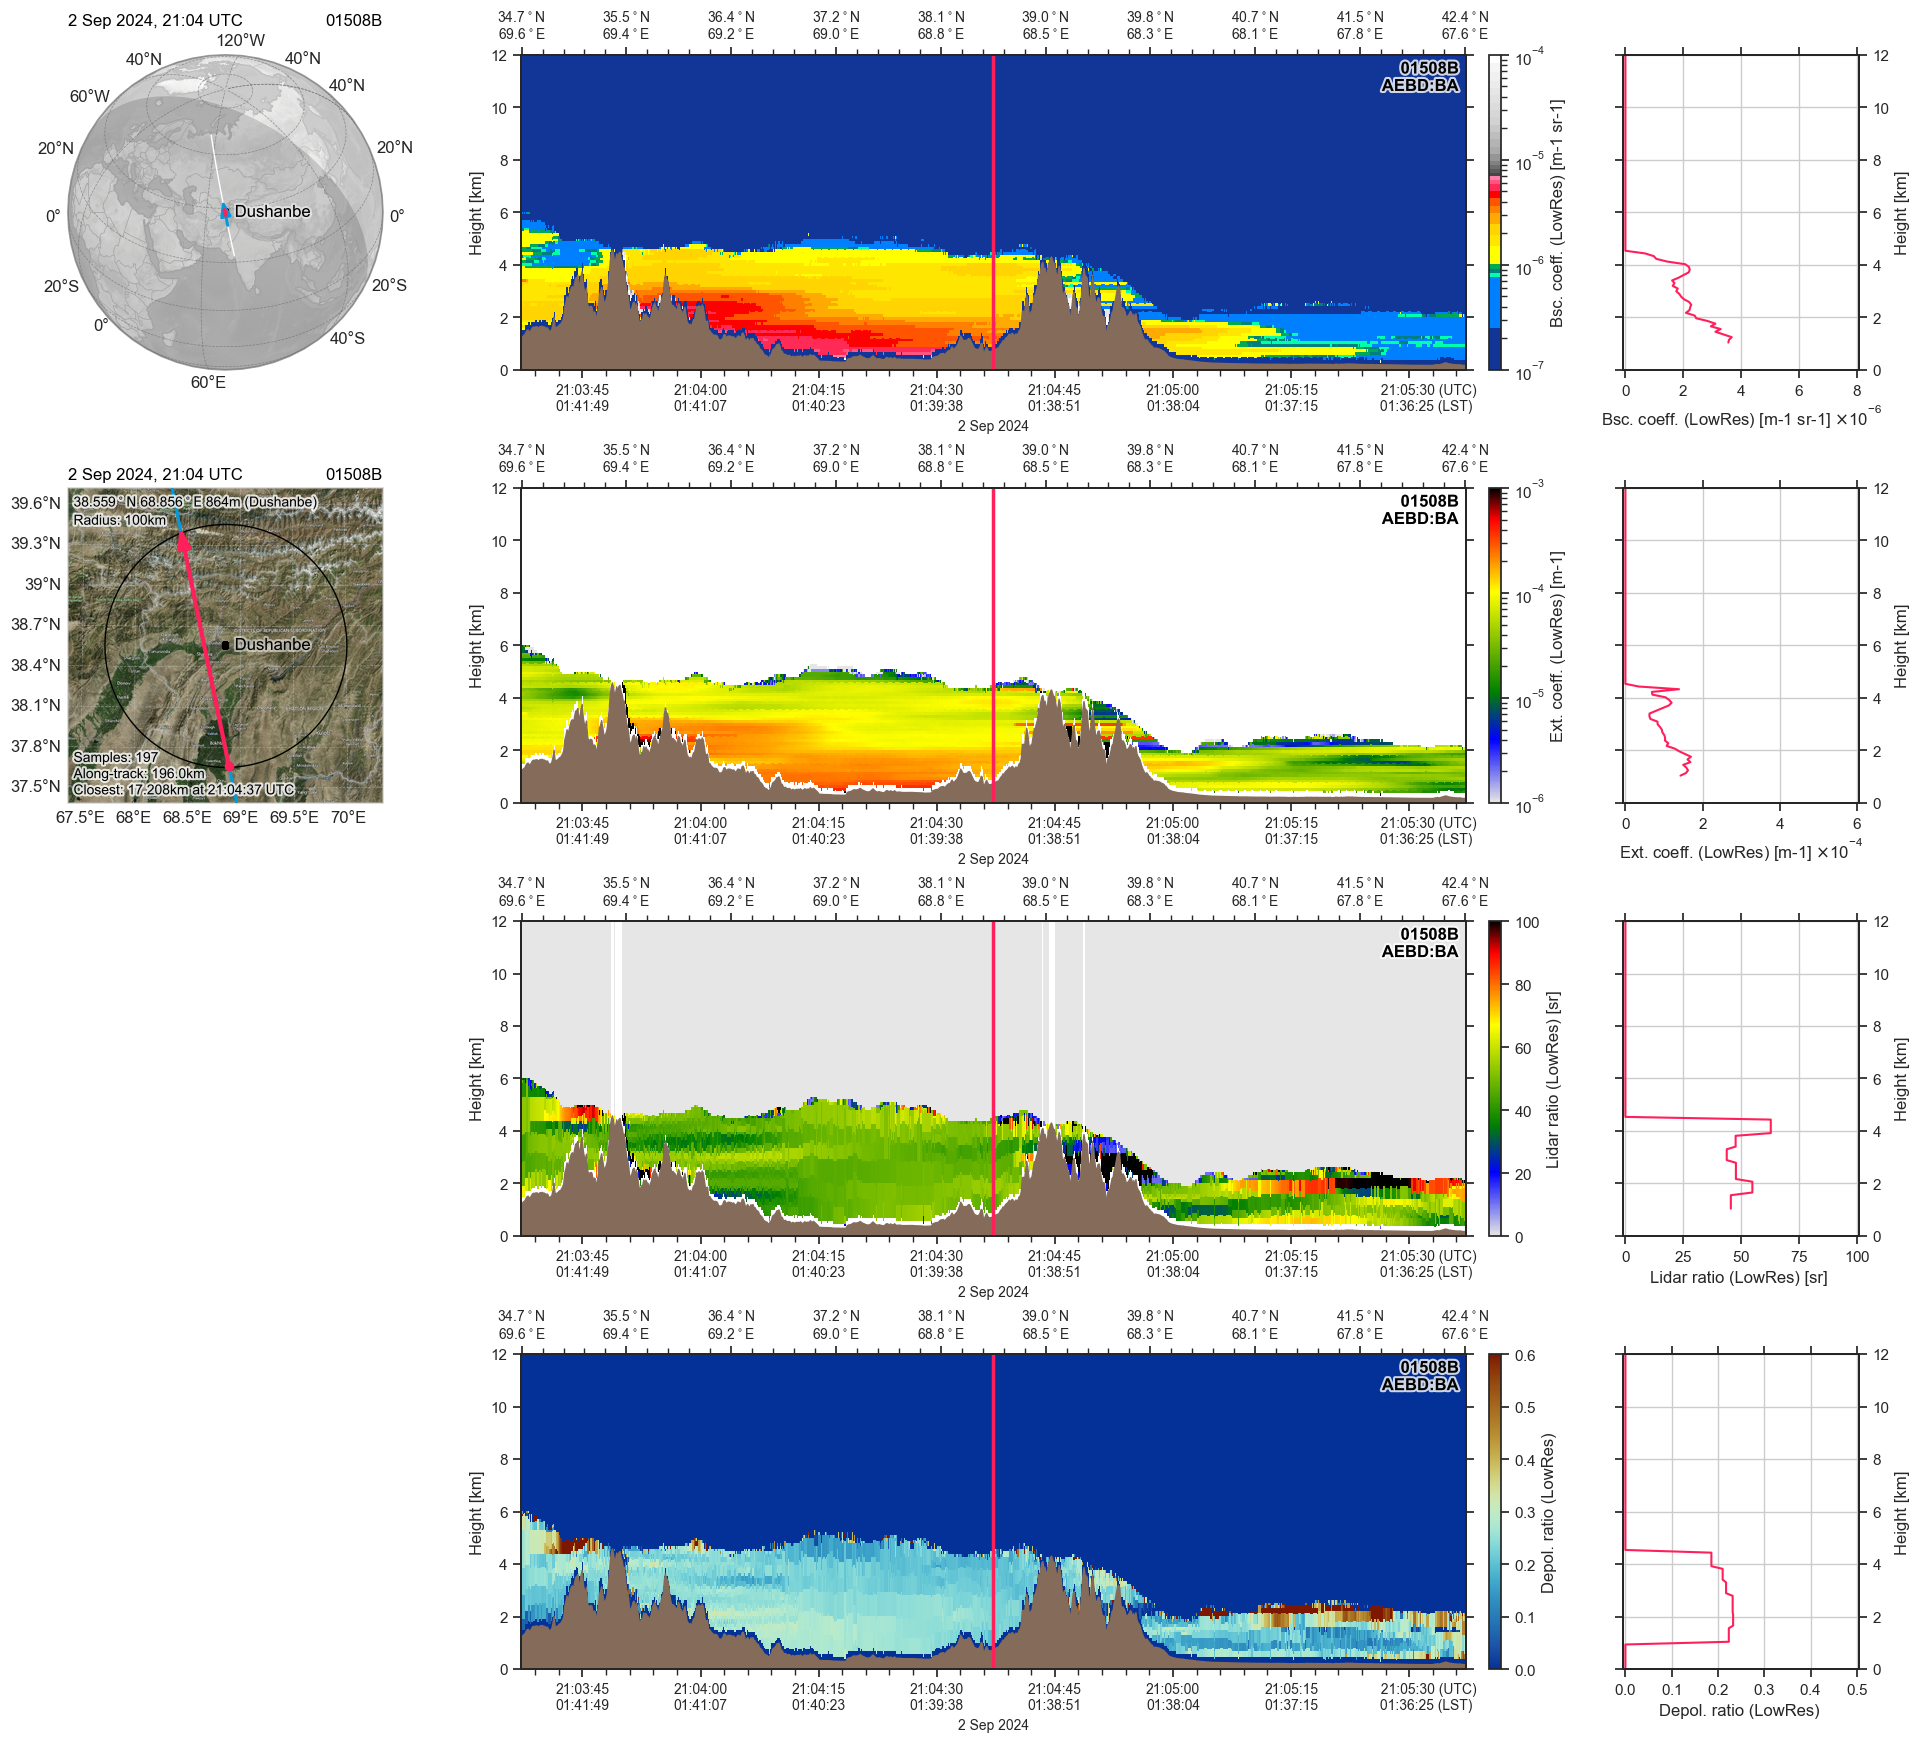

In [19]:
import logging
print("Create a quicklook of the overpass from the A-EBD file:")
print("Note: When plotting profiles from A-PRO products, the `ecquicklook` function will automatically plot only the closest profile within the set radius.")
fig, _ = eck.ecquicklook(
    ds=ds_aebd,
    site=site,
    radius_km=radius_km,
    resolution="low",  # Change the A-EBD resolution as needed
    height_range=(0, 12e3),  # Change the plotting height as needed
    selection_max_time_margin="00:01:00",  # Crop the plot to show only 1 Minute around the overpass start and end times
    logger=logging.getLogger(),  # Optional: Shows plotting progress
)
print("Save the quicklook:")
eck.save_plot(fig, filepath="./01508B_20250902_aebd_quicklook.png")

## **Example 6.2** Create backscatter, extinction, lidar ratio and depol. ratio profile plots and comparison statistics 

2025-08-05 11:24:32,639 [I] c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\utils\read\nc.py:37 - Convert height above ground level to height above ellipsoid.
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerExt_klett_355` not in ground-based data.
  warnings.warn(msg)
c:\Users\baars\Anaconda3\envs\earthcarekit_new\Lib\site-packages\earthcarekit\calval\_compare_bsc_ext_lr_depol.py:74: UserWarning: Variable `aerLR_klett_355` not in ground-based data.
  warnings.warn(msg)


,prediction,target,hmin,hmax,diff_of_means,mae,rmse,mean_diff,mean_prediction,std_prediction,mean_error_prediction,mean_target,std_target,mean_error_target
0,A-EBD low res.,aerBsc_klett_355,2000.0,4000.0,1.109271e-07,2.631402e-07,3.042321e-07,1.109270e-07,0.000002,2.323780e-07,9.522834e-08,0.000002,3.970282e-07,None
1,A-EBD low res.,aerBsc_raman_355,2000.0,4000.0,-1.414149e-08,2.628857e-07,3.209515e-07,-1.414155e-08,0.000002,2.323780e-07,9.522834e-08,0.000002,3.905386e-07,None
2,A-EBD low res.,aerExt_raman_355,2000.0,4000.0,7.944231e-07,1.739399e-05,2.085539e-05,7.944120e-07,0.000095,1.854487e-05,5.007310e-06,0.000096,2.633768e-05,None
3,A-EBD low res.,aerLR_raman_355,2000.0,4000.0,-3.183463e-01,5.569819e+00,6.602010e+00,-3.183447e-01,47.818733,4.325572e+00,1.887125e+00,47.500387,5.831740e+00,None
4,A-EBD low res.,parDepol_klett_355,2000.0,4000.0,-3.922634e-02,3.922637e-02,4.022898e-02,-3.922637e-02,0.219823,1.216171e-02,1.671549e-02,0.180597,1.665617e-02,None
5,A-EBD low res.,parDepol_raman_355,2000.0,4000.0,-2.876647e-02,2.876649e-02,3.040524e-02,-2.876649e-02,0.219823,1.216171e-02,1.671549e-02,0.191057,1.512510e-02,None


Save the plot:
Plot saved (time taken 00:00:00): <d:\earthcarekit_new\examples\notebooks\01508B_20250902_aebd_vs_polly_profiles.png>
Save the stat. results:


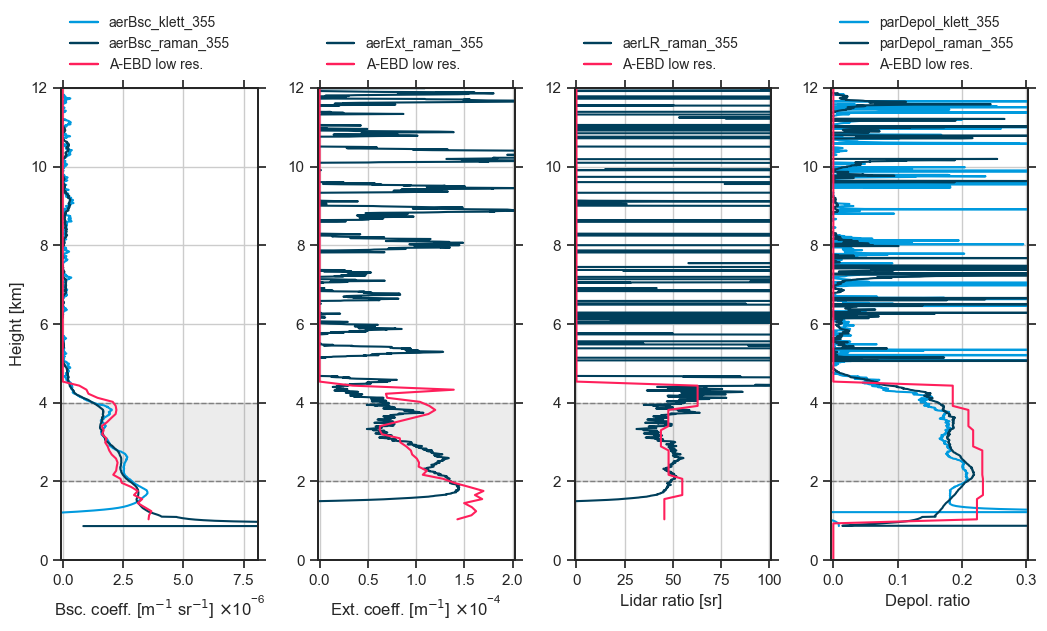

In [20]:
fig, df = eck.compare_bsc_ext_lr_depol(
    fp_ec=fp_aebd,
    fp_target=fp_ground,
    site=site,
    time_var_target="start_time",  # Set to the time variable name in the ground-based dataset
    height_var_target="height",  # Set to the height variable name in the ground-based dataset
    resolustion="low",  # Change the A-EBD resolution as needed
    bsc_var_target=["aerBsc_klett_355", "aerBsc_raman_355"],  # Give at least one bsc. variable name from the ground-based dataset
    ext_var_target=["aerExt_klett_355", "aerExt_raman_355"],  # Give at least one ext. variable name from the ground-based dataset
    lr_var_target=["aerLR_klett_355", "aerLR_raman_355"],  # Give at least one LR variable name from the ground-based dataset
    depol_var_target=["parDepol_klett_355", "parDepol_raman_355"],  # Give at least one depol. variable name from the ground-based dataset    
    vmax_bsc = 0.000008,
    vmax_ext= 0.0002,
    vmax_lr = 100,
    vmax_depol = 0.3,
    height_range=(0,12e3),  # Change the plotting height as needed
    selection_height_range=(2e3, 4e3),  # Change the selected height range to get statistics from as needed or set to None
)
display(df)

print("Save the plot:")
eck.save_plot(fig, filepath="./01508B_20250902_aebd_vs_polly_profiles.png")

print("Save the stat. results:")
df.to_csv("./01508B_20250902_aebd_vs_polly_profiles.csv", index=False)